In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("EV_Raw.csv")
df.head(3)

,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,...,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url
0,Abarth,500e Convertible,155,37.8,Lithium-ion,192.0,235.0,156,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1904/Abarth-500e-C...
1,Abarth,500e Hatchback,155,37.8,Lithium-ion,192.0,235.0,149,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1903/Abarth-500e-H...
2,Abarth,600e Scorpionissima,200,50.8,Lithium-ion,102.0,345.0,158,280,5.9,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3057/Abarth-600e-S...


In [3]:
df.sample(5)

,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,...,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url
423,Volkswagen,ID.3 GTX Performance,200,79.0,Lithium-ion,288.0,545.0,131,465,5.6,...,0.0,385,5,RWD,C - Medium,4322,1809,1538,Hatchback,https://ev-database.org/car/2153/Volkswagen-ID...
333,Porsche,Taycan 4 Cross Turismo,220,97.0,Lithium-ion,396.0,610.0,188,510,4.7,...,0.0,446,5,AWD,F - Luxury,4974,1967,1409,Station/Estate,https://ev-database.org/car/2110/Porsche-Tayca...
368,Skoda,Elroq RS,180,79.0,Lithium-ion,288.0,679.0,151,450,5.4,...,1200.0,470,5,AWD,JC - Medium,4488,1884,1608,SUV,https://ev-database.org/car/3183/Skoda-Elroq-RS
248,Mercedes-Benz,EQT 200 Long,132,45.0,Lithium-ion,NaN,245.0,177,220,13.3,...,1500.0,828,7,FWD,N - Passenger Van,4922,1859,1811,Small Passenger Van,https://ev-database.org/car/2239/Mercedes-Benz...
318,Polestar,2 Long Range Dual Motor (MY26),205,79.0,Lithium-ion,324.0,740.0,142,455,4.5,...,1500.0,407,5,AWD,D - Large,4606,1859,1479,Liftback Sedan,https://ev-database.org/car/3152/Polestar-2-Lo...


* Cleaning *

In [4]:
df.isnull().sum()

brand                          0
model                          1
top_speed_kmh                  0
battery_capacity_kWh           0
battery_type                   0
number_of_cells              202
torque_nm                      7
efficiency_wh_per_km           0
range_km                       0
acceleration_0_100_s           0
fast_charging_power_kw_dc      1
fast_charge_port               1
towing_capacity_kg            26
cargo_volume_l                 1
seats                          0
drivetrain                     0
segment                        0
length_mm                      0
width_mm                       0
height_mm                      0
car_body_type                  0
source_url                     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand                      478 non-null    object 
 1   model                      477 non-null    object 
 2   top_speed_kmh              478 non-null    int64  
 3   battery_capacity_kWh       478 non-null    float64
 4   battery_type               478 non-null    object 
 5   number_of_cells            276 non-null    float64
 6   torque_nm                  471 non-null    float64
 7   efficiency_wh_per_km       478 non-null    int64  
 8   range_km                   478 non-null    int64  
 9   acceleration_0_100_s       478 non-null    float64
 10  fast_charging_power_kw_dc  477 non-null    float64
 11  fast_charge_port           477 non-null    object 
 12  towing_capacity_kg         452 non-null    float64
 13  cargo_volume_l             477 non-null    object 

In [6]:
df.drop_duplicates()

,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,...,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url
0,Abarth,500e Convertible,155,37.8,Lithium-ion,192.0,235.0,156,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1904/Abarth-500e-C...
1,Abarth,500e Hatchback,155,37.8,Lithium-ion,192.0,235.0,149,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1903/Abarth-500e-H...
2,Abarth,600e Scorpionissima,200,50.8,Lithium-ion,102.0,345.0,158,280,5.9,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3057/Abarth-600e-S...
3,Abarth,600e Turismo,200,50.8,Lithium-ion,102.0,345.0,158,280,6.2,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3056/Abarth-600e-T...
4,Aiways,U5,150,60.0,Lithium-ion,NaN,310.0,156,315,7.5,...,NaN,496,5,FWD,JC - Medium,4680,1865,1700,SUV,https://ev-database.org/car/1678/Aiways-U5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,Zeekr,7X Premium RWD,210,71.0,Lithium-ion,NaN,440.0,148,365,6.0,...,2000.0,539,5,RWD,JD - Large,4787,1930,1650,SUV,https://ev-database.org/car/3081/Zeekr-7X-Prem...
474,Zeekr,X Core RWD (MY25),190,49.0,Lithium-ion,NaN,343.0,148,265,5.9,...,1600.0,362,5,RWD,JB - Compact,4432,1836,1566,SUV,https://ev-database.org/car/3197/Zeekr-X-Core-RWD
475,Zeekr,X Long Range RWD (MY25),190,65.0,Lithium-ion,NaN,343.0,146,360,5.6,...,1600.0,362,5,RWD,JB - Compact,4432,1836,1566,SUV,https://ev-database.org/car/3198/Zeekr-X-Long-...
476,Zeekr,X Privilege AWD (MY25),190,65.0,Lithium-ion,NaN,543.0,153,350,3.8,...,1600.0,362,5,AWD,JB - Compact,4432,1836,1566,SUV,https://ev-database.org/car/3199/Zeekr-X-Privi...


In [7]:
# Handlling missing value
df.dropna(subset = ['model'],inplace=True)

In [8]:
df_cells_mean = round(df['number_of_cells'].mean(),0)
df.fillna({'number_of_cells' : df_cells_mean},inplace = True)

In [9]:
df_torque_mode = round(df['torque_nm'].median(),0)
df.fillna({'torque_nm': df_torque_mode} , inplace=True)

In [10]:
df.fillna({'towing_capacity_kg' :round(df['towing_capacity_kg'].mean(),0)},inplace=True)

In [11]:
df.fillna({'fast_charge_port':'CCS'}, inplace=True)

In [12]:
df['cargo_volume_l']= pd.to_numeric(df['cargo_volume_l'], errors='coerce')
df.fillna({'cargo_volume_l':round(df['cargo_volume_l'].mean(),0)}, inplace=True)

In [13]:
df.fillna({'fast_charging_power_kw_dc':round(df['fast_charging_power_kw_dc'].mean(),1)},inplace=True)

* Analysis *

In [14]:
# Number of EV in dataset
len(df)

477

In [15]:
# top 5 EV cars brand and model with top speed
df.sort_values('top_speed_kmh',ascending= False)[['brand','model','top_speed_kmh']].head(5)

,brand,model,top_speed_kmh
211,Maserati,GranTurismo Folgore,325
348,Porsche,Taycan Turbo GT Weissach,305
210,Maserati,GranCabrio Folgore,290
347,Porsche,Taycan Turbo GT,290
402,Tesla,Model S Plaid,282


In [16]:
#  top 5 EV car range
df[['brand','model','range_km']].sort_values('range_km',ascending= False).head(5)

,brand,model,range_km
239,Mercedes-Benz,EQS 450+,685
194,Lucid,Air Grand Touring,665
238,Mercedes-Benz,EQS 450 4MATIC,655
241,Mercedes-Benz,EQS 580 4MATIC,640
240,Mercedes-Benz,EQS 500 4MATIC,640


In [17]:
#  Most popular body type 
df['car_body_type'].value_counts().head(3)

car_body_type
SUV          244
Sedan         63
Hatchback     56
Name: count, dtype: int64

In [25]:
#  Average battery capacity
print(df['battery_capacity_kWh'].mean())

74.1125786163522


In [37]:
# Time taken to meet 0 to 100 km/hr speed
df.sort_values('acceleration_0_100_s',ascending=True )[['acceleration_0_100_s','brand','model']].head(3)

,acceleration_0_100_s,brand,model
348,2.2,Porsche,Taycan Turbo GT Weissach
402,2.3,Tesla,Model S Plaid
347,2.3,Porsche,Taycan Turbo GT


<Axes: title={'center': 'relation between range and battery capacity'}, xlabel='battery_capacity_kWh', ylabel='range_km'>

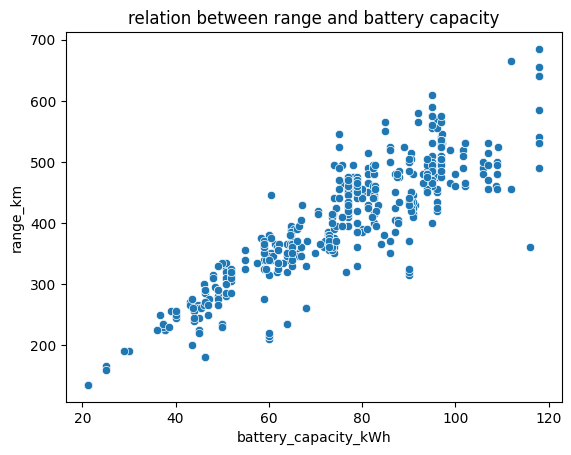

In [55]:
plt.title('relation between range and battery capacity')
sns.scatterplot(data=df,x='battery_capacity_kWh',y='range_km')

In [21]:
df[['battery_capacity_kWh','range_km']].corr()

,battery_capacity_kWh,range_km
battery_capacity_kWh,1.000000,0.879917
range_km,0.879917,1.000000


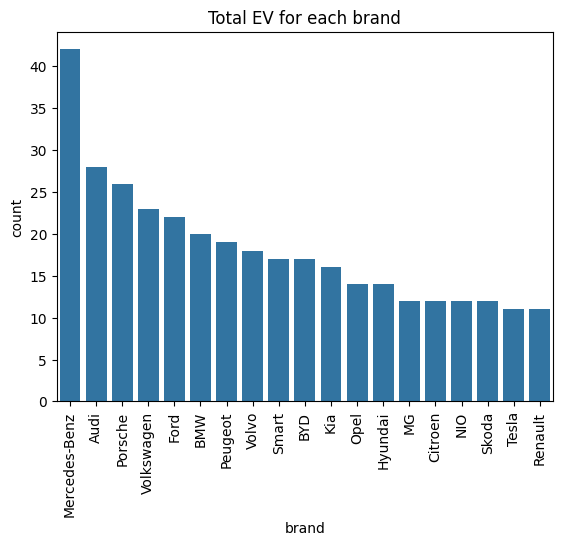

In [48]:
brand_counts = df['brand'].value_counts()
brand_count= (brand_counts[brand_counts.values >10]).reset_index()
plt.xticks(rotation='vertical')
plt.title('Total EV for each brand')
brand_count.columns=['brand','count']
sns.barplot(data=brand_count,x='brand',y='count')

g= plt.show()


In [51]:
print(brand_counts[brand_counts.values >10].head(3))

brand
Mercedes-Benz    42
Audi             28
Porsche          26
Name: count, dtype: int64


In [52]:
df.to_csv('EV_cleaned.csv',index = False)